# Part 2: The Fourier Transform and the Frequency Domain

## The "recipe" for a signal

In the previous section, we discussed how signals can be composed of multiple sine waves. We can use a function called the Fourier Transform to decompose a signal into its constituent sine waves.

Lets look at an example of a synthetic signal composed of four sine waves:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')

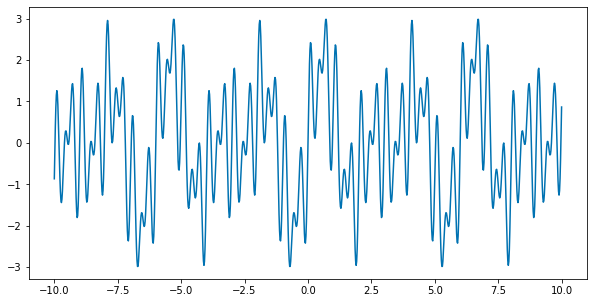

In [34]:
f = [1/2, 1/3, 2, 3]
n_samples = 1001
x = np.linspace(-10, 10, n_samples)
y = [np.sin(x*freq*(2*np.pi)) for freq in f] 
y = np.sum(y, axis=0)

plt.figure(figsize=(10,5))
plt.plot(x,y);

And now lets look at how we can use `scipy.fftpack.fft` (fft stands for "Fast Fourier Transform") to identify the individual sine wave components used to create the synthic signal:

In [21]:
from scipy.fftpack import fft, fftfreq, fftshift

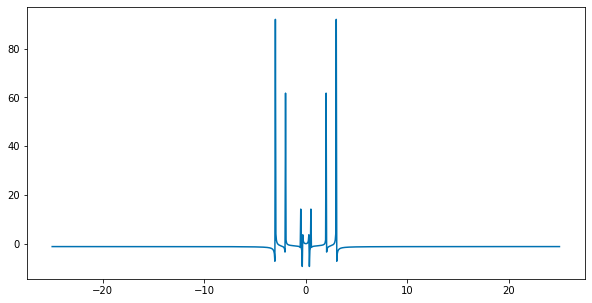

In [35]:
freq_y = fftshift(fft(y)) # fft, with centered origin
freq_x = fftshift(fftfreq(x.size, x[1] - x[0])) # find frequencies of fft

plt.figure(figsize=(10,5))
plt.plot(freq_x, freq_y);

If you look carefully, you can see four spikes in that plot. These are more obvious if you zoom in:

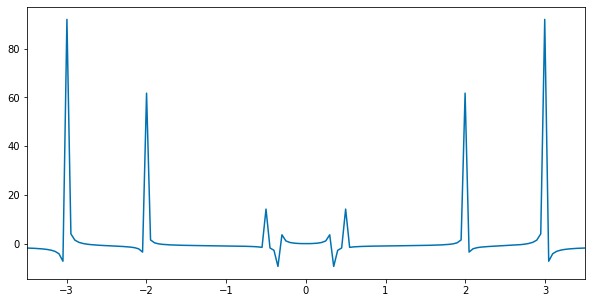

In [41]:
plt.figure(figsize=(10,5))
plt.xlim(-3.5,3.5)
plt.plot(freq_x, freq_y);

Now you can notice that the four peaks are located at exactly the frequencies of the sine waves we used to create the synthetic signal.

What is really amazing, at least to me, is that you can decompose **any** digital signal into its frequency componenets using the Fast Fourier Transform! 